# House Prices Advanced Regression Techniques

In [52]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import os
from sklearn.preprocessing import scale 

# hide warnings
import warnings
warnings.filterwarnings('ignore')



In [53]:
# import Housing.csv
train = pd.read_csv('train.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Preprocessing

In [55]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


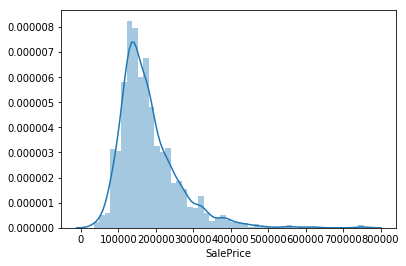

In [56]:
sns.distplot(train['SalePrice']);
print('Skewness:',train['SalePrice'].skew())
print('Kurtosis:',train['SalePrice'].kurt())

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


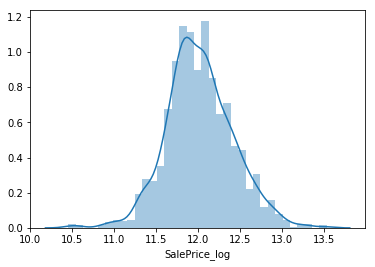

In [57]:
train['SalePrice_log'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice_log']);
print('Skewness:',train['SalePrice_log'].skew())
print('Kurtosis:',train['SalePrice_log'].kurt())
train.drop('SalePrice',axis = 1,inplace = True)

#### Filling Nulls

In [58]:
#Null Columns
train.columns[train.isnull().sum() > 0 ]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [59]:
#There are "None" in data, so replacing with null
train = train.replace('None',np.nan)


In [60]:
#Sum of nulls
train.loc[:, train.isnull().sum() > 0].isnull().sum().sort_values()


Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [61]:
#dropping columns which have more null dATA
train.drop(["Fence","Alley","MiscFeature","PoolQC","MasVnrType","FireplaceQu",],axis = 1,inplace =True)

In [62]:
#Deciding about LotFrontage
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [63]:
train.LotFrontage.fillna(train['LotFrontage'].median(),inplace = True)

In [64]:
train.loc[:, train.isnull().sum() > 0].isnull().sum().sort_values()


Electrical       1
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [65]:
#Replace all the empty garage with "no" as it doesn't have any garage
train.GarageType.fillna("no",inplace = True)
train.GarageYrBlt.fillna(0,inplace = True)
train.GarageFinish.fillna("no",inplace = True)
train.GarageQual.fillna("no",inplace = True)
train.GarageCond.fillna("no",inplace = True)



In [66]:
train.loc[:, train.isnull().sum() > 0].isnull().sum().sort_values()


Electrical       1
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
dtype: int64

In [67]:
train.BsmtQual.fillna("no",inplace = True)
train.BsmtCond.fillna("no",inplace = True)
train.BsmtFinType1.fillna("no",inplace = True)
train.BsmtExposure.fillna("no",inplace = True)
train.BsmtFinType2.fillna("no",inplace = True)


In [68]:
train.loc[:, train.isnull().sum() > 0].isnull().sum().sort_values()


Electrical    1
MasVnrArea    8
dtype: int64

In [69]:
train.Electrical.mode()

0    SBrkr
dtype: object

In [70]:
train.MasVnrArea.fillna(0,inplace = True)
train.Electrical.fillna(train.Electrical.mode(),inplace = True)



In [71]:
#lastly droping ID checking shape
train.drop("Id",axis = 1,inplace = True)
train.shape

(1460, 74)

Final shape is (1460,74)

### Correlations

In [1]:
#seperating numerical data from categorical data for plotting correlation
num_cols =  train.select_dtypes(include=[np.number]).columns.tolist()
len(num_cols)

NameError: name 'train' is not defined

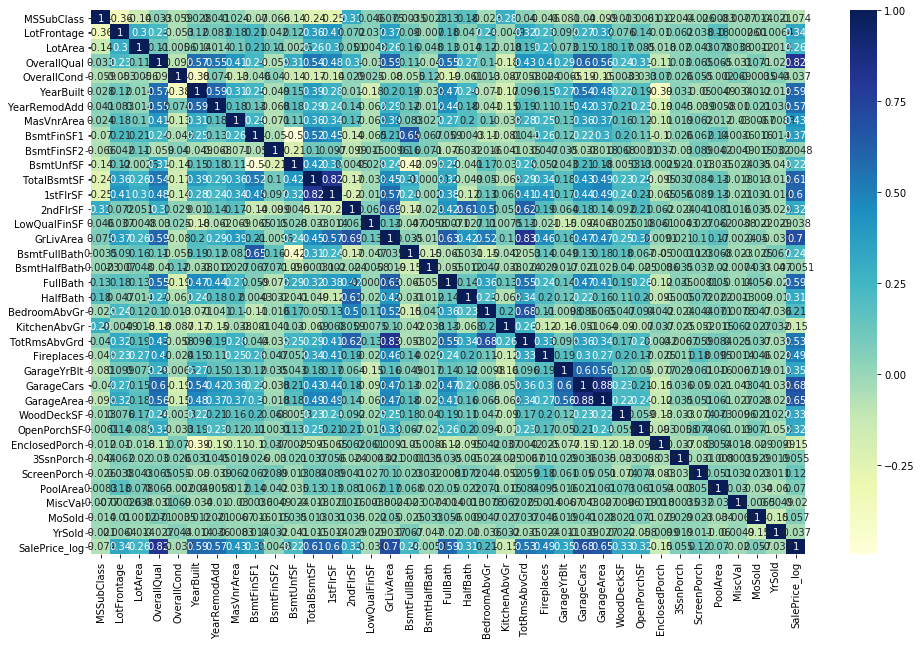

In [73]:
#Correlations of only numerical data
plt.figure(figsize = (16, 10))
sns.heatmap(train[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [74]:
# correlation matrix
cor_numVar = train[num_cols].corr()


In [75]:
corHigh = cor_numVar[abs(cor_numVar['SalePrice_log']) > 0.5]

In [76]:
#Numeric variables having highest correlations
corHigh.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice_log'],
      dtype='object')

In [77]:
train[corHigh.index].corr()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice_log
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.817185
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.586570
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.565608
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.612134
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.596981
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.700927
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.594771
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.534422
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.680625
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.650888


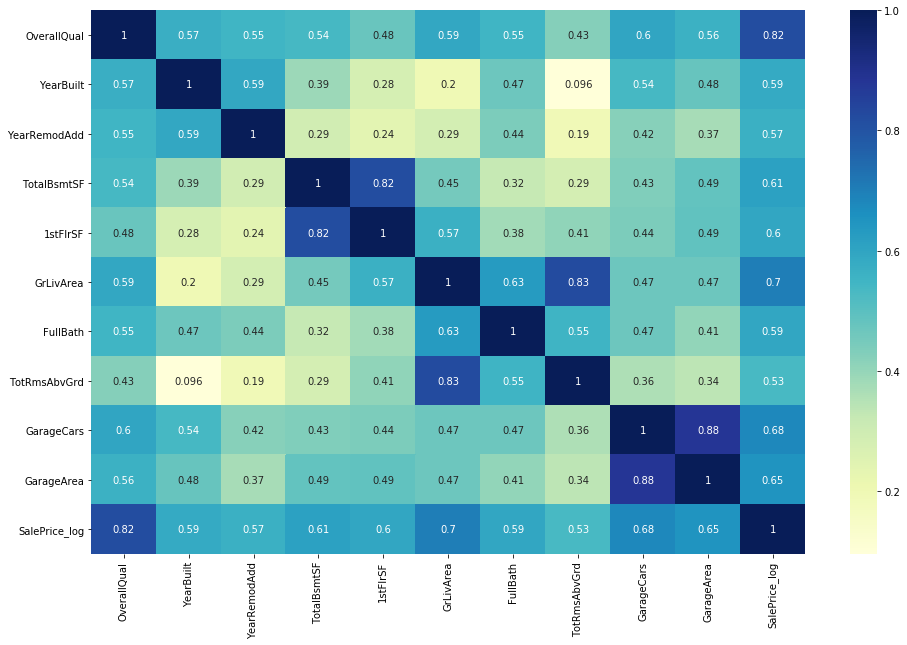

In [78]:
#High correlations
plt.figure(figsize = (16, 10))
sns.heatmap(train[corHigh.index].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Categorical Data

In [79]:
#categorical list
cat_cols = list(set(train.columns) - set(num_cols))
print(len(cat_cols))

37


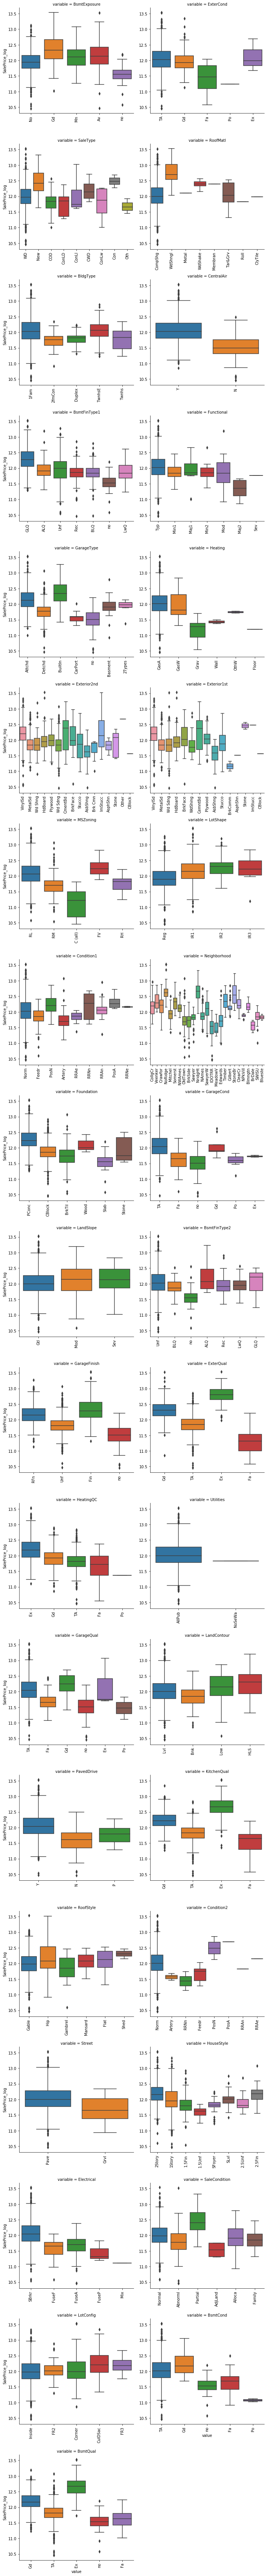

In [80]:
    
def boxplot(x, y, **kwargs):
        sns.boxplot(x=x, y=y)
        x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice_log'], value_vars=cat_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice_log")
plt.show()

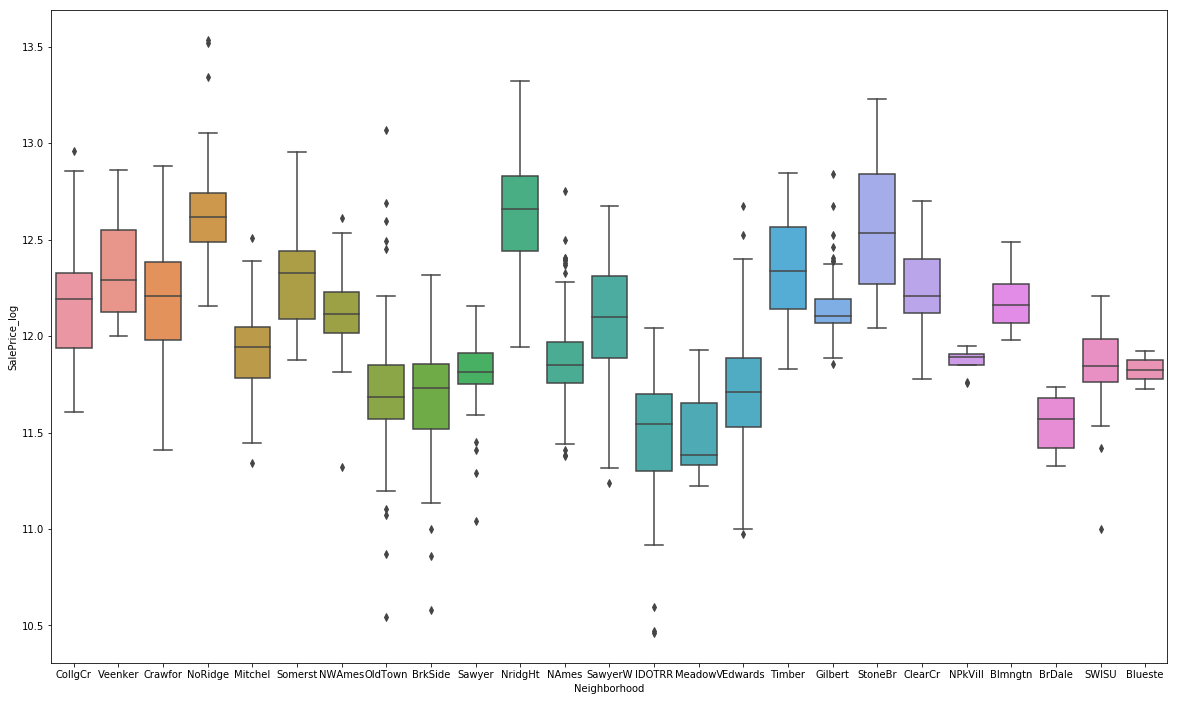

In [81]:
#plot Neighbourhood name seperately
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice_log', data = train)
plt.show()

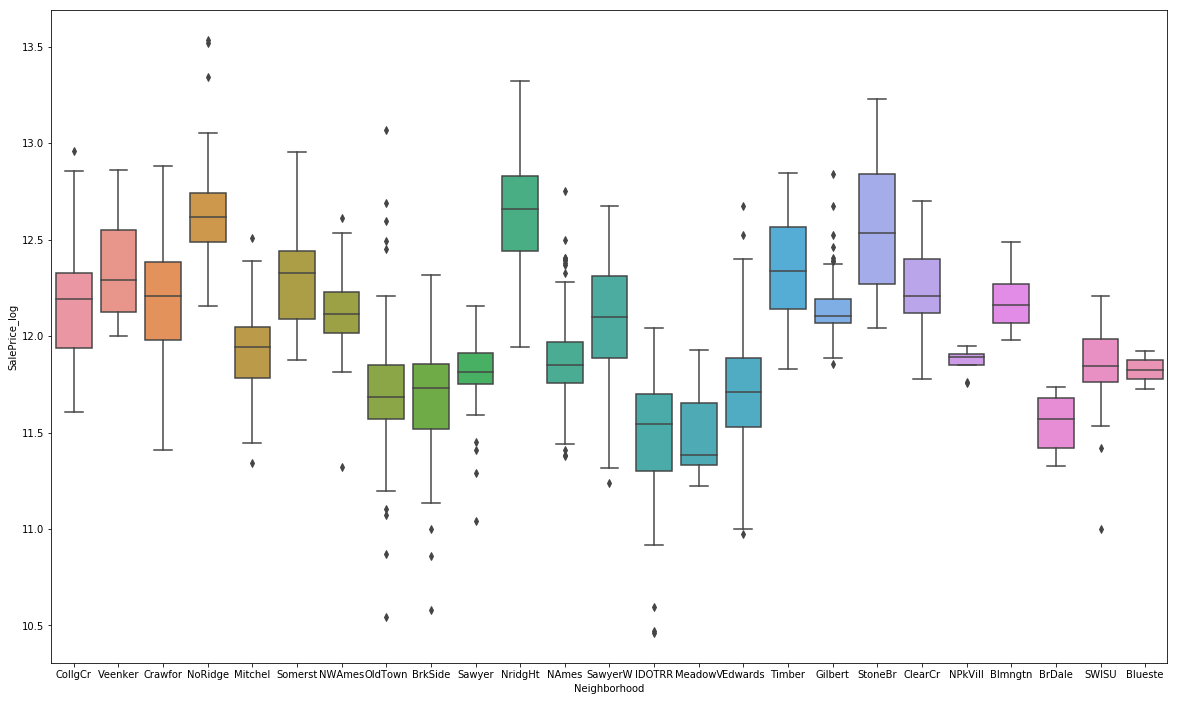

In [82]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice_log', data = train)
plt.show()

In [83]:
train.GarageYrBlt.dtypes

dtype('float64')

In [84]:
for cat in cat_cols:
    print('--'*40)
    print(cat)
    print(train[cat].value_counts())

--------------------------------------------------------------------------------
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
no     38
Name: BsmtExposure, dtype: int64
--------------------------------------------------------------------------------
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
--------------------------------------------------------------------------------
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
--------------------------------------------------------------------------------
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64
--------------------------------------------------------------------------------
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCo

### Feature Engineering

In [85]:
##ENcoding

In [86]:
#Encode the ordinal data, starting 0 as low

#basement
train['BsmtFinType1'] = train['BsmtFinType1'].map({'no':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['BsmtFinType2'] = train['BsmtFinType2'].map({'no':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
train['BsmtExposure'] = train['BsmtExposure'].map({'no':0,'No':1,'Mn':2,'Av':3,'Gd':4})
train['BsmtCond'] = train['BsmtCond'].map({'no':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
train['BsmtQual'] = train['BsmtQual'].map({'no':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

#Quality related
train['ExterQual'] = train['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['ExterCond'] = train['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['HeatingQC'] = train['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['KitchenQual'] = train['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
#train['FireplaceQu'] = train['FireplaceQu'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['GarageQual'] = train['GarageQual'].map({'no':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
train['GarageCond'] = train['GarageCond'].map({'no':0,'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train['GarageFinish'] = train['GarageFinish'].map({'no':0,'Unf':1,'RFn':2,'Fin':3})
train['GarageType'] = train['GarageType'].map({'no':0,'Detchd':1,'CarPort':2,'BuiltIn':3,
                                                         'Basment':4,'Attchd':5,'2Types':6})

#house realated
train['LotShape'] = train['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
train['LandContour'] = train['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
train['Utilities'] = train['Utilities'].map({'ELO': 0,'NoSeWa':1,'NoSewr':2,'AllPub':3})
train['BldgType'] = train['BldgType'].map({'Twnhs':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})
train['HouseStyle'] = train['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,
                                                         '2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
train['Functional'] = train['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,
                                                         'Mod':4,'Min2':5,'Min1':6,'Typ':7})

#others
train['LandSlope'] = train['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
train['Street'] = train['Street'].map({'Grvl':0,'Pave':1})
#train['MasVnrType'] = train['MasVnrType'].map({'None':0,'BrkCmn':1,'BrkFace':2,'CBlock':3,'Stone':4})
train['CentralAir'] = train['CentralAir'].map({'N':0,'Y':1})
train['PavedDrive'] = train['PavedDrive'].map({'N':0,'P':1,'Y':2})



In [87]:
#categorical list
cat_cols = train.dtypes[train.dtypes == "object"].index
cat_cols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'SaleType', 'SaleCondition'],
      dtype='object')

In [88]:
num_cols = train.dtypes[train.dtypes != "object"].index
len(num_cols)


60

In [89]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress = False)
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1460.00,69.86,22.03,21.00,60.00,69.00,79.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
Street,1460.00,1.00,0.06,0.00,1.00,1.00,1.00,1.00
LotShape,1460.00,2.59,0.58,0.00,2.00,3.00,3.00,3.00
LandContour,1460.00,2.81,0.61,0.00,3.00,3.00,3.00,3.00
Utilities,1460.00,3.00,0.05,1.00,3.00,3.00,3.00,3.00
LandSlope,1460.00,0.06,0.28,0.00,0.00,0.00,0.00,2.00
BldgType,1460.00,3.56,1.07,0.00,4.00,4.00,4.00,4.00
HouseStyle,1460.00,1.56,1.95,0.00,0.00,1.00,3.00,7.00


In [90]:
#Creating New features

In [91]:
#Years converting to Age

CurrentYr = pd.to_numeric(datetime.datetime.now().year)

YearBuilt = pd.to_numeric(train.YearBuilt)
HouseAge = CurrentYr - YearBuilt
list(map(lambda x : x if x < 1000 else 0,HouseAge))
train["HouseAge"] = HouseAge
train.drop("YearBuilt",axis = 1,inplace = True)

YearRemoAdd = pd.to_numeric(train.YearRemodAdd)
YearRemoAdd = CurrentYr - YearRemoAdd
list(map(lambda x : x if x < 1000 else 0,YearRemoAdd))
train["RemodAge"] = YearRemoAdd
train.drop("YearRemodAdd",axis = 1,inplace = True)


GarYrblt = pd.to_numeric(train.GarageYrBlt)
GarageAge = CurrentYr - GarYrblt
list(map(lambda x : x if x < 1000 else 0,GarageAge))
train["GarageAge"] = GarageAge
train.drop(["GarageYrBlt"],axis =1,inplace = True)

YrSold = pd.to_numeric(train.YrSold)
SoldAge = CurrentYr - YrSold
list(map(lambda x : x if x < 1000 else 0,SoldAge))
train["SoldAge"] = SoldAge
train.drop(["SoldAge"],axis =1,inplace = True)





In [92]:
#Create some other features

train['Total_sqr_footage'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] +
                                 train['1stFlrSF'] + train['2ndFlrSF'])
train['Total_Bathrooms'] = (train['FullBath'] + (0.5*train['HalfBath']) + 
                               train['BsmtFullBath'] + (0.5*train['BsmtHalfBath']))

train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] +
                              train['EnclosedPorch'] + train['ScreenPorch'] +
                             train['WoodDeckSF'])

#simplified features
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [93]:
cat_cols = train.dtypes[train.dtypes == "object"].index
cat_cols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'SaleType', 'SaleCondition'],
      dtype='object')

In [94]:
num_cols = train.dtypes[train.dtypes != "object"].index
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_log', 'HouseAge', 'RemodAge',
       'GarageAge', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf',
       'haspool', 'has2ndf

In [95]:
#Creating dummy Variables
# Get the dummy variables for the feature
status = pd.get_dummies(train[cat_cols],drop_first = True)

# Check what the dataset 'status' looks like
status.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
train.drop(cat_cols, axis = 1,inplace = True)


In [97]:
# Add the results to the original housing dataframe
train = pd.concat([train, status], axis = 1)

# Now let's see the head of our dataframe.
train.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,1,3,3,3,0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.00,9600,1,3,3,3,0,4,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.00,11250,1,2,3,3,0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.00,9550,1,2,3,3,0,4,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.00,14260,1,2,3,3,0,4,3,...,0,0,0,0,1,0,0,0,1,0


#### Spliting data

In [98]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

### Normalization

In [99]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [100]:
#applying scale on num_cols
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_train.head()

df_test[num_cols] = scaler.fit_transform(df_test[num_cols])
df_test.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,BldgType,HouseStyle,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.00,0.13,0.05,1.00,1.00,1.00,0.00,0.00,1.00,0.00,...,0,0,0,0,1,0,0,0,1,0
57,0.24,0.23,0.07,1.00,0.67,1.00,0.00,0.00,1.00,0.43,...,0,0,0,0,1,0,0,0,1,0
780,0.00,0.14,0.04,1.00,1.00,1.00,0.00,0.00,1.00,0.00,...,0,0,0,0,1,0,0,0,1,0
382,0.24,0.20,0.05,1.00,0.67,1.00,0.00,0.00,1.00,0.43,...,0,0,0,0,1,0,0,0,1,0
1170,0.35,0.19,0.05,1.00,1.00,1.00,0.00,0.00,1.00,1.00,...,0,0,0,0,1,0,0,0,1,0


In [101]:
# Split the train dataset into X and y
y_train = df_train.pop('SalePrice_log')
X_train = df_train

y_test = df_test.pop('SalePrice_log')
X_test = df_test


## Modelling

#### RFE

In [102]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [103]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     430.4
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:01   Log-Likelihood:                 1797.5
No. Observations:                1021   AIC:                            -3553.
Df Residuals:                    1000   BIC:                            -3449.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1872    

In [104]:
#drop unsuitable variables
X_train_new = X_train_lm.drop(['PoolArea'], axis=1)


#### model2

In [105]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     452.2
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:02   Log-Likelihood:                 1796.2
No. Observations:                1021   AIC:                            -3552.
Df Residuals:                    1001   BIC:                            -3454.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2364    

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20748.35
8,GarageAge,1050.29
10,hasgarage,1027.00
12,RoofMatl_CompShg,27.04
16,RoofMatl_Tar&Grv,10.15
17,RoofMatl_WdShake,7.06
18,RoofMatl_WdShngl,6.93
7,HouseAge,3.63
2,OverallQual,2.63
13,RoofMatl_Membran,2.54


In [107]:
X_train_new = X_train_new.drop(['GarageAge'], axis=1)


In [108]:
#model3
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     470.6
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:02   Log-Likelihood:                 1789.3
No. Observations:                1021   AIC:                            -3541.
Df Residuals:                    1002   BIC:                            -3447.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9075    

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1655.68
11,RoofMatl_CompShg,26.99
15,RoofMatl_Tar&Grv,10.12
16,RoofMatl_WdShake,7.04
17,RoofMatl_WdShngl,6.91
2,OverallQual,2.59
12,RoofMatl_Membran,2.53
13,RoofMatl_Metal,2.53
14,RoofMatl_Roll,2.52
5,TotalBsmtSF,2.14


In [110]:
X_train_new = X_train_new.drop(['haspool'], axis=1)


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1396.68
10,RoofMatl_CompShg,22.30
14,RoofMatl_Tar&Grv,8.51
15,RoofMatl_WdShake,5.94
16,RoofMatl_WdShngl,5.80
2,OverallQual,2.59
11,RoofMatl_Membran,2.27
12,RoofMatl_Metal,2.26
13,RoofMatl_Roll,2.25
5,TotalBsmtSF,2.14


In [112]:
X_train_new = X_train_new.drop(['RoofMatl_CompShg'], axis=1)


In [113]:
#model4
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     334.5
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:03   Log-Likelihood:                 1584.6
No. Observations:                1021   AIC:                            -3135.
Df Residuals:                    1004   BIC:                            -3051.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1394    

After removing one of RoofMaterial, our model is not getting adjusted any of roofmaterial.
So,removing features related RoofMaterial

In [114]:
#droping related to Roofmaterial
X_train_new = X_train_new.drop(['RoofMatl_WdShake'], axis=1)
X_train_new = X_train_new.drop(['RoofMatl_Roll'], axis=1)
X_train_new = X_train_new.drop(['RoofMatl_Membran'], axis=1)
X_train_new = X_train_new.drop(['RoofMatl_Metal'], axis=1)
X_train_new = X_train_new.drop(['RoofMatl_Tar&Grv'], axis=1)
X_train_new = X_train_new.drop(['RoofMatl_WdShngl'], axis=1)


In [115]:
#model5
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     533.2
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:03   Log-Likelihood:                 1580.4
No. Observations:                1021   AIC:                            -3139.
Df Residuals:                    1010   BIC:                            -3085.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1383    

In [116]:
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'], axis=1)


In [117]:
#model6
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     588.7
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:03   Log-Likelihood:                 1577.2
No. Observations:                1021   AIC:                            -3134.
Df Residuals:                    1011   BIC:                            -3085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1357      0.012     

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.14
2,OverallQual,2.52
5,TotalBsmtSF,2.05
7,HouseAge,1.97
6,GrLivArea,1.78
4,BsmtFinSF1,1.46
3,OverallCond,1.25
1,LotArea,1.14
8,hasgarage,1.10
9,Condition2_PosN,1.05


Now we are good to go as all the p-values and VIF are in range

### Evaluation

In [119]:
#test set
X_train_new = X_train_new.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]



In [120]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [121]:
#r2 score
from sklearn.metrics import r2_score
print("r2-score for test set",r2_score(y_test, y_pred))

r2-score for test set 0.3965693441162903



The R2-score of Train set is 0.838 and R2 of test set is only 0.396

This shows a over-fitting problem, lets deal this with regularization



### Regularization

### Ridge Regression



In [122]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train_new, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
print(coefs)



[array([ 1.32998253e-10,  1.34596499e-10, -1.18173855e-11,  1.13852754e-10,
        2.09950299e-10,  1.73254122e-10, -7.03987566e-11,  3.30751820e-11,
        6.80970533e-12]), array([ 1.75815863e-10,  1.77928651e-10, -1.56218881e-11,  1.50506641e-10,
        2.77541939e-10,  2.29031753e-10, -9.30630131e-11,  4.37234441e-11,
        9.00202966e-12]), array([ 2.32418224e-10,  2.35211205e-10, -2.06512167e-11,  1.98960922e-10,
        3.66894109e-10,  3.02766499e-10, -1.23023826e-10,  5.77998199e-11,
        1.19001534e-11]), array([ 3.07243213e-10,  3.10935370e-10, -2.72996931e-11,  2.63014629e-10,
        4.85012420e-10,  4.00239494e-10, -1.62630258e-10,  7.64079603e-11,
        1.57313023e-11]), array([ 4.06157446e-10,  4.11038260e-10, -3.60885876e-11,  3.47689861e-10,
        6.41157875e-10,  5.29093056e-10, -2.14987630e-10,  1.01006827e-10,
        2.07958557e-11]), array([ 5.36916240e-10,  5.43368390e-10, -4.77069888e-11,  4.59625533e-10,
        8.47572978e-10,  6.99429881e-10, -2.

#### Finding Alpha

In [123]:
#Finding ALpha

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train_new, y_train)
ridgecv.alpha_


0.10772173450159389

In [124]:
#fitting on model
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train_new, y_train)

# Adding a constant variable 
X_test_new = X_test[X_train_new.columns]

y_pred_ridge = ridge4.predict(X_test_new)
mean_squared_error(y_test, y_pred_ridge)



0.012807875248797087

In [125]:
print('R^2 =',explained_variance_score(y_test,ridge4.predict(X_test_new)))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R^2 = 0.8414015991306618
RMSE 0.11317188364959331


Text(0,0.5,'weights')

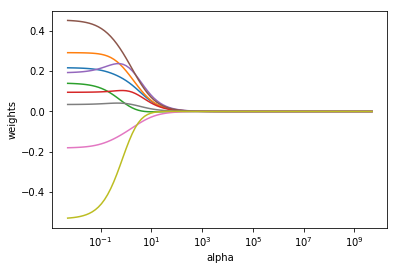

In [126]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')

In [127]:
pd.Series(ridge4.coef_, index = X_train_new.columns).sort_values(ascending = False)

GrLivArea          0.41
OverallQual        0.28
TotalBsmtSF        0.22
LotArea            0.20
OverallCond        0.11
BsmtFinSF1         0.10
hasgarage          0.04
HouseAge          -0.16
Condition2_PosN   -0.46
dtype: float64

#### LASSO

In [128]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

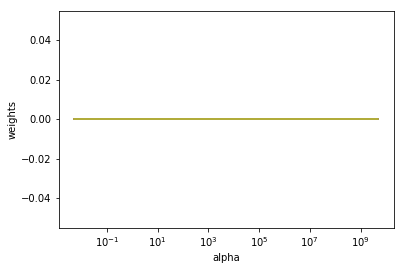

In [129]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_new, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights');

In [130]:
#Finding Alpha
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train_new, y_train)
print(lassocv.alpha_)


5000000000.0


In [131]:
#Fitting the model
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train_new, y_train)



Lasso(alpha=5000000000.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
# Adding a constant variable 
X_test_new = X_test[X_train_new.columns]
mean_squared_error(y_test, lasso.predict(X_test_new))

0.02193290405289787

In [133]:
coef = pd.Series(lasso.coef_, index = X_train_new.columns).sort_values(ascending = False)


In [134]:
lasso.coef_

array([ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.])

In [135]:
#Ridge Coefficients
pd.Series(ridge4.coef_, index = X_train_new.columns).sort_values(ascending = False)

GrLivArea          0.41
OverallQual        0.28
TotalBsmtSF        0.22
LotArea            0.20
OverallCond        0.11
BsmtFinSF1         0.10
hasgarage          0.04
HouseAge          -0.16
Condition2_PosN   -0.46
dtype: float64